<a href="https://colab.research.google.com/github/vinybrasil/teoria_matematica/blob/master/edo_python/tcc_graficos_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import scipy.linalg as la
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [2]:
#ponto de lp

def preco_lp(m, teta, i_ext, psi, y):
  plp = m +teta*i_ext - psi*y 
  return plp

def cambio_lp(b0, b1, p_exp, m, teta, i_ext, y, psi):
  clp = -(b0/b1) - p_ext +m +(teta + b2/b1)*i_ext + y*(-psi + 1/b1)
  return clp

In [3]:
#parametros:

psi = 0.05 #0.05
teta = 0.6 #0.5
b1 = 25 #20
b2 = 0.2 #0.01
mi = 0.02 #0.01

#variaveis exogenas:

m0 = 100 #100
b0 = 400 #500
yn = 1000 #2000
i_ext = 3 #3
p_ext = 1 #0

#choque monetario

m1 = 101

#variaveis de longo prazo

plp_m0 = preco_lp(m0, teta, i_ext, psi, yn)
clp_m0 = cambio_lp(b0, b1, p_ext, m0, teta, i_ext, yn, psi)


plp_m1 = preco_lp(m1, teta, i_ext, psi, yn)
clp_m1 = cambio_lp(b0, b1, p_ext, m1, teta, i_ext, yn, psi)

print(plp_m0, clp_m0)
print(plp_m1, clp_m1)

51.8 74.824
52.8 75.824


In [4]:
#onde as diferenciais são zero


def p_zero(x_novo, b0, p_ext, b1, b2, teta, m, y_n, psi):
  p_zero = []
  for i in x_novo:
    s = -(b0/b1) - p_ext + i*(1+(b2/(b1*teta))) - (b2*m)/(b1*teta) + y_n*(1/b1 + (psi*b2)/(b1*teta) )
    p_zero.append(s)
  return p_zero

def s_zero(x_novo, m, b0, psi, b1, i_ext, teta, b2, p_ext):
  s_zero = []
  for i in x_novo:
    s = -p_ext + (m - b0*psi - i*(1 - psi*b1) + i_ext*(teta + psi*b2))/(psi*b1)
    s_zero.append(s)
  return s_zero


x_novo = np.arange(-100,100,4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


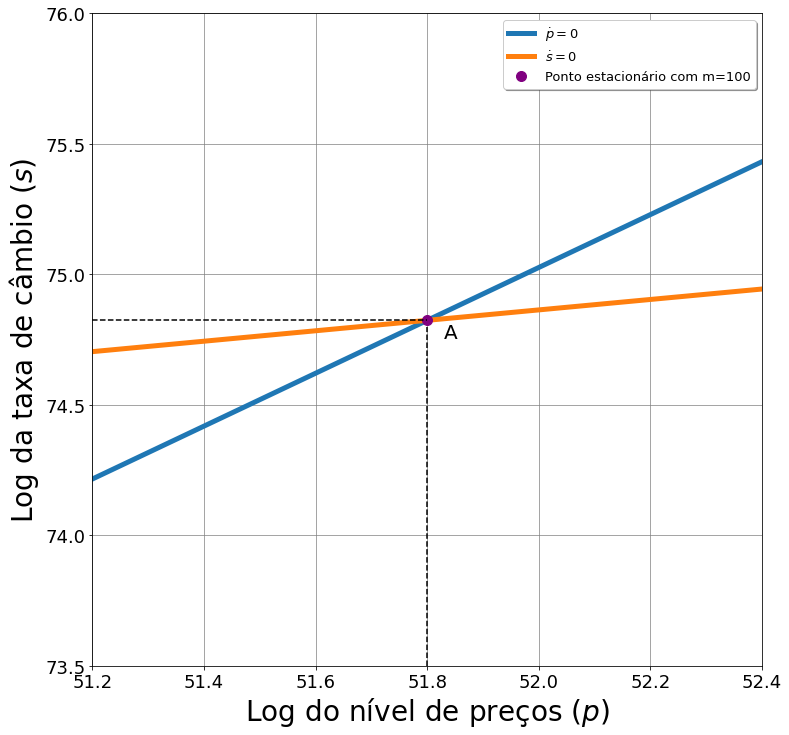

In [51]:
x = np.linspace(51.2, 52.5, 20)
y = np.linspace(73.5, 76, 20)

X, Y = np.meshgrid(x, y)

fig= plt.figure(figsize=(12,12))

plt.xlabel('Log do nível de preços ($p$)', fontsize=28)
plt.ylabel('Log da taxa de câmbio ($s$)', fontsize=28)

plt.grid(c='gray', linestyle='-', linewidth=0.7)
p_zerozada = p_zero(x_novo, b0, p_ext, b1, b2, teta, m0, yn, psi)
s_zerozada = s_zero(x_novo, m0, b0, psi, b1, i_ext, teta, b2, p_ext)
plt.plot(x_novo,p_zerozada, label="$\dot{p}=0$", linewidth=5)
plt.plot(x_novo,s_zerozada, label="$\dot{s}=0$", linewidth=5)
plt.xlim([51.2, 52.4])
plt.ylim([73.5, 76])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.title("Interseção das curvas $\dot{s}=0$ e $\dot{p} = 0$", fontsize=28, pad=30)
plt.plot(plp_m0, clp_m0, 'ro', markersize=10, label="Ponto estacionário com m=100", color='purple')
plt.axes().annotate("A", xy=(plp_m0+0.03, clp_m0-0.07), fontsize=20)

#linha tracejada horizontal até A
x_d = np.array(np.arange(51.2, plp_m0+0.03,0.05))
d_vector = np.full((len(np.arange(51.2, plp_m0+0.03,0.05))), clp_m0)
plt.plot(x_d, d_vector, color='black', linestyle='dashed')

#linha tracejada vertical até A

y_d = np.array(np.arange(73.5, clp_m0,0.05))
d_vector = np.full(len(np.arange(73.5, clp_m0,0.05)),plp_m0 )
plt.plot(d_vector, y_d, color='black', linestyle='dashed')

plt.legend(loc='best', shadow=True, facecolor='white', fontsize=13)
plt.savefig('s_0_p_0.png')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

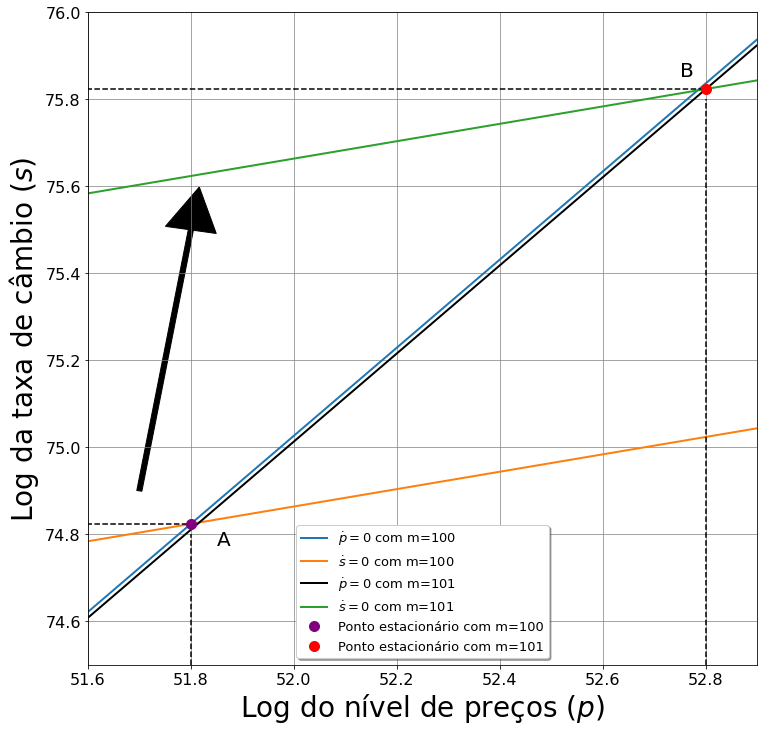

In [64]:
#fig, ax = plt.subplots()

x = np.linspace(51.2, 52.5, 20)
y = np.linspace(73.5, 76, 20)

X, Y = np.meshgrid(x, y)

plt.figure(figsize=(12,12))

plt.xlabel('Log do nível de preços ($p$)', fontsize=28)
plt.ylabel('Log da taxa de câmbio ($s$)', fontsize=28)

plt.grid(c='grey', linestyle='-', linewidth=0.7)

p_zerozada = p_zero(x_novo, b0, p_ext, b1, b2, teta, m0, yn, psi)
s_zerozada = s_zero(x_novo, m0, b0, psi, b1, i_ext, teta, b2, p_ext)
plt.plot(x_novo,p_zerozada, label="$\dot{p}=0$ com m=100", linewidth=2)
plt.plot(x_novo,s_zerozada, label="$\dot{s}=0$ com m=100", linewidth=2)


p_zerozada_m1 = p_zero(x_novo, b0, p_ext, b1, b2, teta, m1, yn, psi)
s_zerozada_m1 = s_zero(x_novo, m1, b0, psi, b1, i_ext, teta, b2, p_ext)
plt.plot(x_novo,p_zerozada_m1, label="$\dot{p}=0$ com m=101", linewidth=2, color='black')
plt.plot(x_novo,s_zerozada_m1, label="$\dot{s}=0$ com m=101", linewidth=2)

plt.axes().arrow(51.7, 74.9, 0.1, 0.6,width=0.01, head_width=0.1, head_length=0.1, fc='k', ec='k')


#linha tracejada horizontal até A
x_d = np.array(np.arange(51.2, plp_m0+0.03,0.05))
d_vector = np.full((len(np.arange(51.2, plp_m0+0.03,0.05))), clp_m0)
plt.plot(x_d, d_vector, color='black', linestyle='dashed')

#linha tracejada vertical até A

y_d = np.array(np.arange(74.5, clp_m0,0.05))
d_vector = np.full(len(np.arange(74.5, clp_m0,0.05)),plp_m0 )
plt.plot(d_vector, y_d, color='black', linestyle='dashed')


#linha tracejada horizontal para B
x_d = np.array(np.arange(51.2, plp_m1+0.03,0.05))
d_vector = np.full((len(np.arange(51.2, plp_m1+0.03,0.05))), clp_m1)
plt.plot(x_d, d_vector, color='black', linestyle='dashed')

#linha tracejada vertical até B

y_d = np.array(np.arange(74.5, clp_m1,0.05))
d_vector = np.full(len(np.arange(74.5, clp_m1,0.05)),plp_m1 )
plt.plot(d_vector, y_d, color='black', linestyle='dashed')


plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim([51.6, 52.9])
plt.ylim([74.5, 76])
plt.axes().annotate("A", xy=(plp_m0+0.05, clp_m0-0.05), fontsize=20)
plt.axes().annotate("B", xy=(plp_m1-0.05, clp_m1+0.03), fontsize=20)

plt.plot(plp_m0, clp_m0, 'ro', markersize=10, label="Ponto estacionário com m=100", color='purple')
plt.plot(plp_m1, clp_m1, 'ro', markersize=10, label="Ponto estacionário com m=101")
plt.legend(loc='best', shadow=True, facecolor='white', fontsize=13)
plt.savefig('s_0_p_0_apos_expansao.png')

In [45]:
def variedade_estavel(x_novo, clp, plp, eig,  teta):

  y_estavel = [] 
  for i in x_novo:
    y = clp + (i/(teta * eig)) - plp/(teta * eig)
    y_estavel.append(y)
  return y_estavel

def overshooting(m0, m1, teta, eig, s):
  deriv = 1 - 1/(eig*teta)
  monet = m1 - m0
  final = s + deriv*monet
  return final


A = np.array([[-mi*(b1+b2/teta), mi*b1],[1/teta, 0]])
autocoisas = np.linalg.eig(A)
y_estavel_m0 = variedade_estavel(x_novo, clp_m0, plp_m0, autocoisas[0][0],  teta)
y_estavel_m1 = variedade_estavel(x_novo, clp_m1, plp_m1, autocoisas[0][0],  teta)

d = overshooting(m0, m1, teta, autocoisas[0][0], clp_m0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:68: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future versio

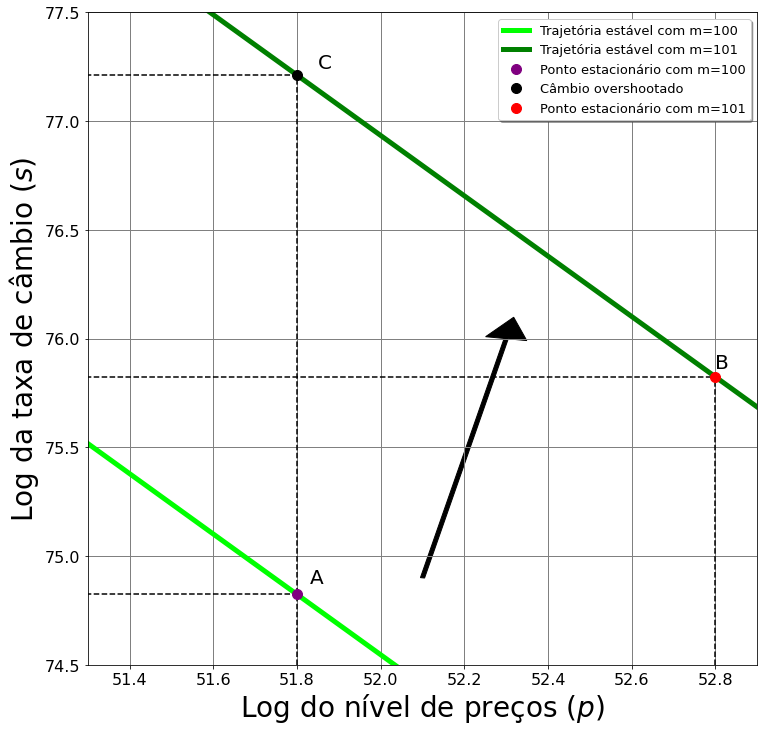

In [65]:
fig= plt.figure(figsize=(12,12))

plt.xlabel('Log do nível de preços ($p$)', fontsize=28)
plt.ylabel('Log da taxa de câmbio ($s$)', fontsize=28)


#seta
plt.axes().arrow(52.1, 74.9, 0.2, 1.1,width=0.01, head_width=0.1, head_length=0.1, fc='k', ec='k')

plt.grid(c='gray', linestyle='-', linewidth=1)

#curvas antes da expansao
#p_zerozada = p_zero(x_novo, b0, p_ext, b1, b2, teta, m0, yn, psi)
#s_zerozada = s_zero(x_novo, m0, b0, psi, b1, i_ext, teta, b2, p_ext)
#plt.plot(x_novo,p_zerozada, label="$\dot{p}=0$ com m=100", linewidth=2)
#plt.plot(x_novo,s_zerozada, label="$\dot{s}=0$ com m=100", linewidth=2)
  
#curvas depois da expansao
#p_zerozada_m1 = p_zero(x_novo, b0, p_ext, b1, b2, teta, m1, yn, psi)
#s_zerozada_m1 = s_zero(x_novo, m1, b0, psi, b1, i_ext, teta, b2, p_ext)
#plt.plot(x_novo,p_zerozada_m1, label="$\dot{p}=0$ com m=101", linewidth=2)
#plt.plot(x_novo,s_zerozada_m1, label="$\dot{s}=0$ com m=101", linewidth=2)


#trajetorias estaveis
plt.plot(x_novo, y_estavel_m0, linewidth=5, color='lime', label='Trajetória estável com m=100')# % round(autocoisas[0][0],4)')      
plt.plot(x_novo, y_estavel_m1, linewidth=5, color='green', label='Trajetória estável com m=101')# % round(autocoisas[0][0],4))        

#plt.axes().arrow(51.7, 74.9, 0.01, 0.1, head_width=0.01, head_length=0.05, fc='k', ec='k')
#plt.axes().arrow(51.9, 74.9, 0.001, 0.5,width=0.001, head_width=0.001, head_length=0.001, fc='k', ec='k')


#tamanho dos numeros nos eixos
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


plt.xlim([51.3, 52.9])
plt.ylim([74.5, 77.5])

#plt.axes().annotate("A", xy=(plp_m0+2, clp_m0+2))
#plt.axes().annotate("B", xy=(plp_m1, clp_m1))

#linha tracejada horizontal para C
d_vector = np.full((13), d)
x_d = np.array(np.arange(51.2, plp_m0+0.03,0.05))
plt.plot(x_d, d_vector, color='black', linestyle='dashed')

#linha tracejada vertical para C  
y_d = np.array(np.arange(74.5, d,0.05))
d_vector = np.full(len(np.arange(74.5, d,0.05)),plp_m0 )
plt.plot(d_vector, y_d, color='black', linestyle='dashed')

#linha tracejada para B
x_d = np.array(np.arange(51.2, plp_m1+0.03,0.05))
d_vector = np.full((len(np.arange(51.2, plp_m1+0.03,0.05))), clp_m1)
plt.plot(x_d, d_vector, color='black', linestyle='dashed')

y_d = np.array(np.arange(74.5, clp_m1,0.05))
d_vector = np.full(len(np.arange(74.5, clp_m1,0.05)),plp_m1 )
plt.plot(d_vector, y_d, color='black', linestyle='dashed')

#linha tracejada até A
x_d = np.array(np.arange(51.2, plp_m0+0.03,0.05))
d_vector = np.full((len(np.arange(51.2, plp_m0+0.03,0.05))), clp_m0)
plt.plot(x_d, d_vector, color='black', linestyle='dashed')

plt.axes().annotate("A", xy=(plp_m0+0.03, clp_m0+0.05), fontsize=20)
plt.axes().annotate("B", xy=(plp_m1, clp_m1+0.04), fontsize=20)
plt.axes().annotate("C", xy=(plp_m0+0.05, d+0.03), fontsize=20)
#plt.title("Trajetórias estáveis após a expansão monetária", fontsize=28, pad=30)
plt.plot(plp_m0, clp_m0, 'ro', markersize=10, label="Ponto estacionário com m=100", color='purple')
plt.plot(plp_m0, d, 'ro', markersize=10, label="Câmbio overshootado", color='black')
plt.plot(plp_m1, clp_m1, 'ro', markersize=10, label="Ponto estacionário com m=101", color='red')
plt.legend(loc='best', shadow=True, facecolor='white', fontsize=13)
plt.savefig('trajetorias_estaveis_apos_expansao.png')